In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Task 1: Exploratory Data Analysis and Data Understanding <a id='task1'></a>

In [5]:
# Load the dataset
df = pd.read_csv("sample_data/urban_energy_consumption.csv")

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset loaded successfully!

Dataset shape: (600, 8)
Number of records: 600
Number of features: 8


In [6]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,household_size,monthly_income_usd,house_size_sqft,num_appliances,avg_daily_temp_c,solar_installed,monthly_energy_kwh,high_energy_usage
0,4,376,1548,14,28.29,0,1673.76,1
1,5,1835,802,10,24.68,0,1372.72,1
2,3,595,2297,10,10.32,1,1430.98,1
3,5,644,1120,17,21.35,1,1573.04,1
4,5,1456,2451,9,34.54,1,1942.90,1
5,2,275,2270,13,33.12,1,1758.30,1
6,3,464,497,18,6.30,0,1229.70,0
7,3,654,1969,6,9.94,1,1179.25,0
8,3,917,1502,8,8.95,1,1083.38,0
9,5,934,1771,5,26.78,0,1516.28,1


In [7]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   household_size      600 non-null    int64  
 1   monthly_income_usd  600 non-null    int64  
 2   house_size_sqft     600 non-null    int64  
 3   num_appliances      600 non-null    int64  
 4   avg_daily_temp_c    600 non-null    float64
 5   solar_installed     600 non-null    int64  
 6   monthly_energy_kwh  600 non-null    float64
 7   high_energy_usage   600 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 37.6 KB


In [8]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,household_size,monthly_income_usd,house_size_sqft,num_appliances,avg_daily_temp_c,solar_installed,monthly_energy_kwh,high_energy_usage
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,3.451667,1077.030000,1383.260000,10.851667,19.83410,0.491667,1350.781633,0.500000
std,1.712469,515.097876,640.735725,4.874690,8.51988,0.500348,350.486259,0.500417
min,1.000000,200.000000,301.000000,3.000000,5.05000,0.000000,431.570000,0.000000
25%,2.000000,648.750000,850.250000,6.750000,12.79500,0.000000,1093.905000,0.000000
50%,4.000000,1073.500000,1340.000000,11.000000,19.94000,0.000000,1345.670000,0.500000
75%,5.000000,1524.500000,1939.250000,15.000000,26.92500,1.000000,1604.910000,1.000000
max,6.000000,1999.000000,2498.000000,19.000000,34.95000,1.000000,2276.110000,1.000000


### 2.1 Data Quality Assessment

In [9]:
# Check for missing values
print("Missing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Data types
print("\nData types:")
print(df.dtypes)

Missing Values Analysis:
household_size        0
monthly_income_usd    0
house_size_sqft       0
num_appliances        0
avg_daily_temp_c      0
solar_installed       0
monthly_energy_kwh    0
high_energy_usage     0
dtype: int64

Total missing values: 0

Number of duplicate rows: 0

Data types:
household_size          int64
monthly_income_usd      int64
house_size_sqft         int64
num_appliances          int64
avg_daily_temp_c      float64
solar_installed         int64
monthly_energy_kwh    float64
high_energy_usage       int64
dtype: object


Target Variable (monthly_energy_kwh) Statistics:
Mean: 1350.78 kWh
Median: 1345.67 kWh
Std Dev: 350.49 kWh
Min: 431.57 kWh
Max: 2276.11 kWh


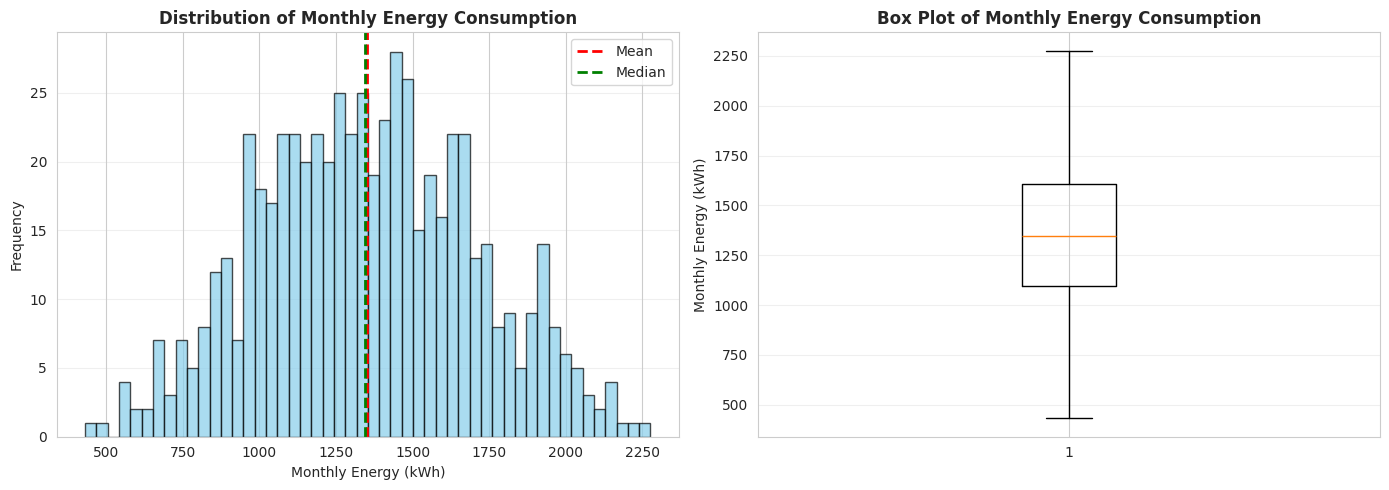


Insight: The distribution shows the spread and central tendency of energy consumption.


In [10]:
# Target variable distribution
print("Target Variable (monthly_energy_kwh) Statistics:")
print(f"Mean: {df['monthly_energy_kwh'].mean():.2f} kWh")
print(f"Median: {df['monthly_energy_kwh'].median():.2f} kWh")
print(f"Std Dev: {df['monthly_energy_kwh'].std():.2f} kWh")
print(f"Min: {df['monthly_energy_kwh'].min():.2f} kWh")
print(f"Max: {df['monthly_energy_kwh'].max():.2f} kWh")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['monthly_energy_kwh'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Monthly Energy Consumption', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Monthly Energy (kWh)')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(df['monthly_energy_kwh'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['monthly_energy_kwh'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()

# Box plot
axes[1].boxplot(df['monthly_energy_kwh'], vert=True)
axes[1].set_title('Box Plot of Monthly Energy Consumption', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Monthly Energy (kWh)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInsight: The distribution shows the spread and central tendency of energy consumption.")

### 2.2 Exploratory Data Analysis (EDA)

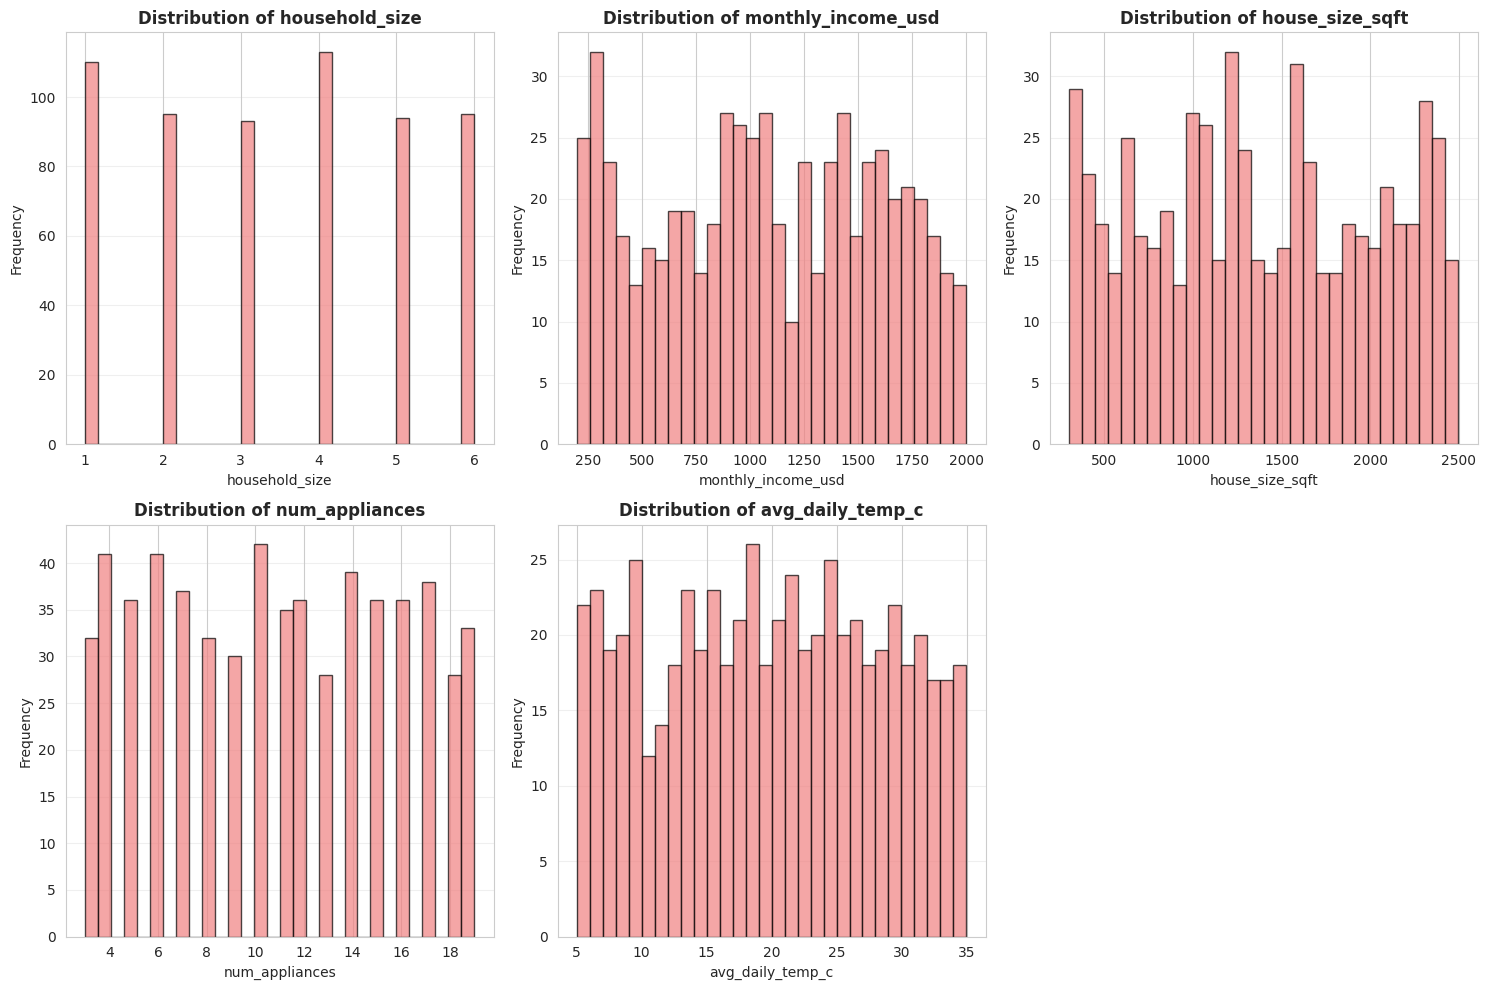

Insight: These histograms reveal the distribution patterns of predictor variables.


In [11]:
# Distribution of predictor variables
predictor_features = ['household_size', 'monthly_income_usd', 'house_size_sqft',
                      'num_appliances', 'avg_daily_temp_c']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(predictor_features):
    axes[idx].hist(df[col], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("Insight: These histograms reveal the distribution patterns of predictor variables.")

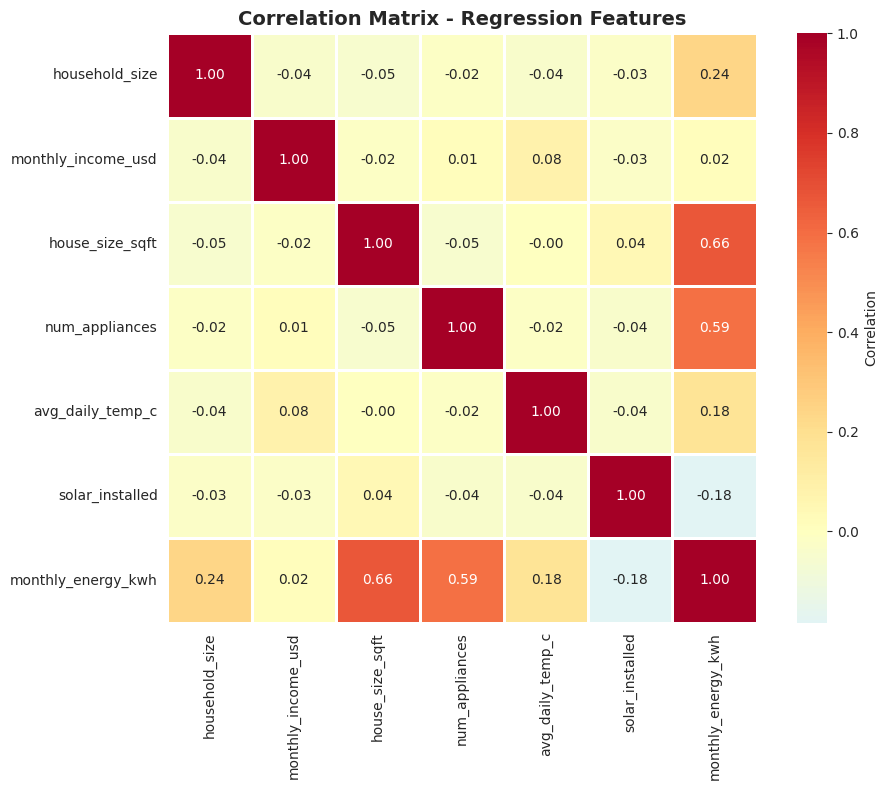


Correlation with Target Variable (monthly_energy_kwh):
monthly_energy_kwh    1.000000
house_size_sqft       0.664024
num_appliances        0.588738
household_size        0.235218
avg_daily_temp_c      0.180968
monthly_income_usd    0.015317
solar_installed      -0.183039
Name: monthly_energy_kwh, dtype: float64

Insight: This shows which features have the strongest linear relationships with energy consumption.


In [12]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('high_energy_usage', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=1, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Regression Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Target Variable (monthly_energy_kwh):")
print(correlation_matrix['monthly_energy_kwh'].sort_values(ascending=False))
print("\nInsight: This shows which features have the strongest linear relationships with energy consumption.")

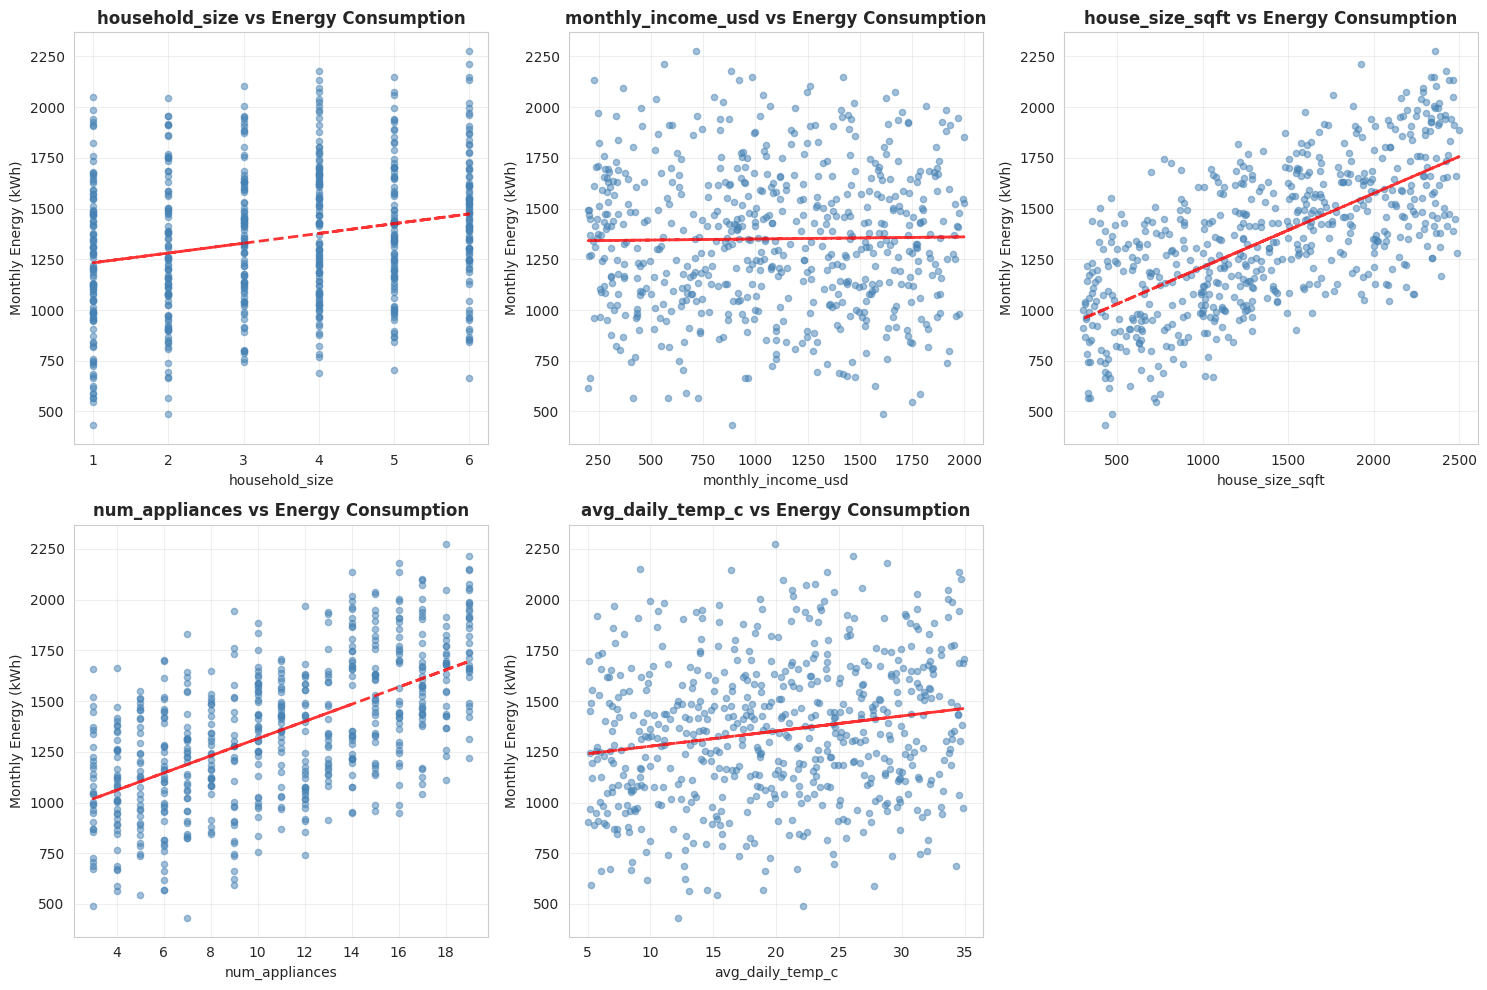

Insight: Scatter plots reveal relationships between individual features and energy consumption.


In [13]:
# Scatter plots: Features vs Target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(predictor_features):
    axes[idx].scatter(df[col], df['monthly_energy_kwh'], alpha=0.5, color='steelblue', s=20)
    axes[idx].set_title(f'{col} vs Energy Consumption', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Monthly Energy (kWh)')
    axes[idx].grid(alpha=0.3)

    # Add trend line
    z = np.polyfit(df[col], df['monthly_energy_kwh'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col], p(df[col]), "r--", alpha=0.8, linewidth=2)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("Insight: Scatter plots reveal relationships between individual features and energy consumption.")

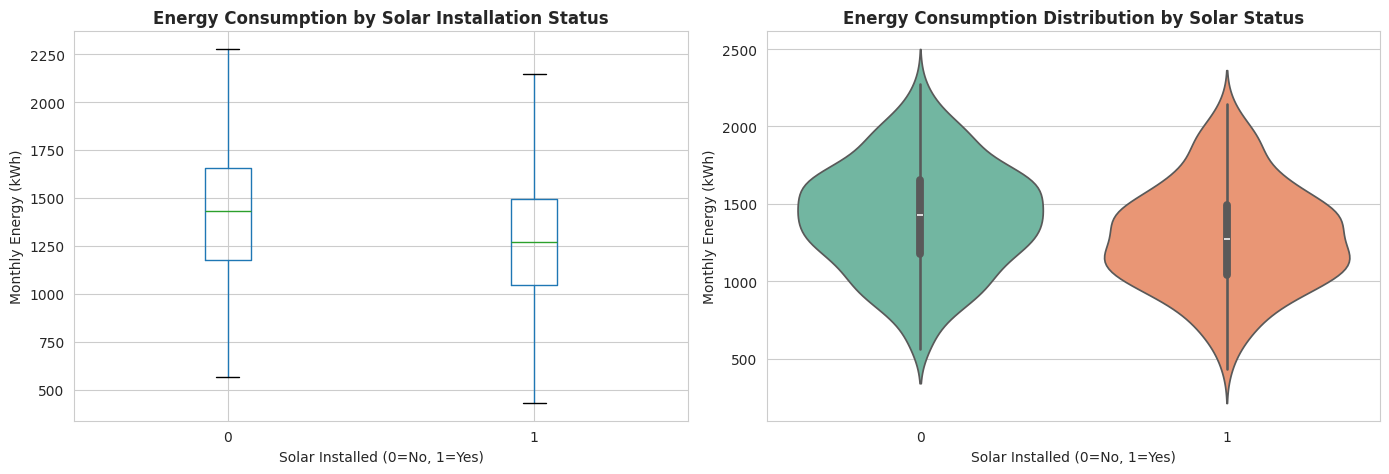

Energy Consumption by Solar Installation:
                 count         mean         std     min       25%      50%  \
solar_installed                                                              
0                305.0  1413.821344  351.367282  566.47  1174.510  1429.56   
1                295.0  1285.604983  337.985094  431.57  1044.245  1271.30   

                     75%      max  
solar_installed                    
0                1656.24  2276.11  
1                1492.45  2146.73  

Insight: This compares energy consumption patterns between households with and without solar panels.


In [14]:
# Solar installation impact on energy consumption
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='monthly_energy_kwh', by='solar_installed', ax=axes[0])
axes[0].set_title('Energy Consumption by Solar Installation Status', fontweight='bold')
axes[0].set_xlabel('Solar Installed (0=No, 1=Yes)')
axes[0].set_ylabel('Monthly Energy (kWh)')
plt.suptitle('')  # Remove default title

# Violin plot
sns.violinplot(data=df, x='solar_installed', y='monthly_energy_kwh', ax=axes[1], palette='Set2')
axes[1].set_title('Energy Consumption Distribution by Solar Status', fontweight='bold')
axes[1].set_xlabel('Solar Installed (0=No, 1=Yes)')
axes[1].set_ylabel('Monthly Energy (kWh)')

plt.tight_layout()
plt.show()

# Statistical comparison
print("Energy Consumption by Solar Installation:")
print(df.groupby('solar_installed')['monthly_energy_kwh'].describe())
print("\nInsight: This compares energy consumption patterns between households with and without solar panels.")

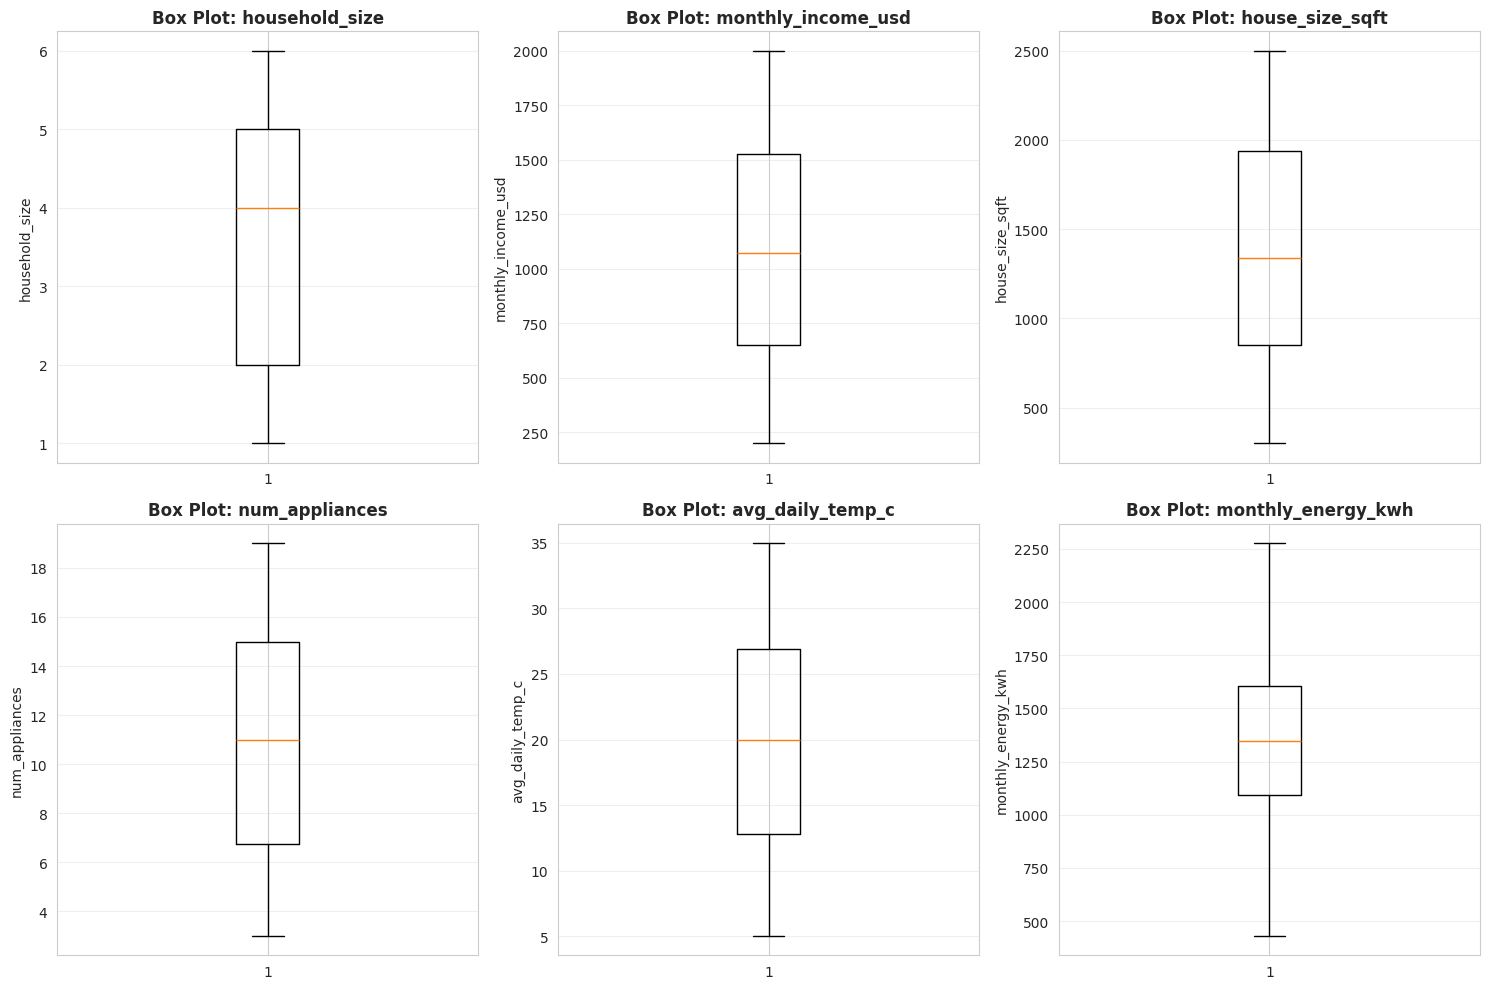

Insight: Box plots help identify potential outliers that might affect model performance.


In [15]:
# Outlier detection using box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

numeric_cols = predictor_features + ['monthly_energy_kwh']

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Box plots help identify potential outliers that might affect model performance.")

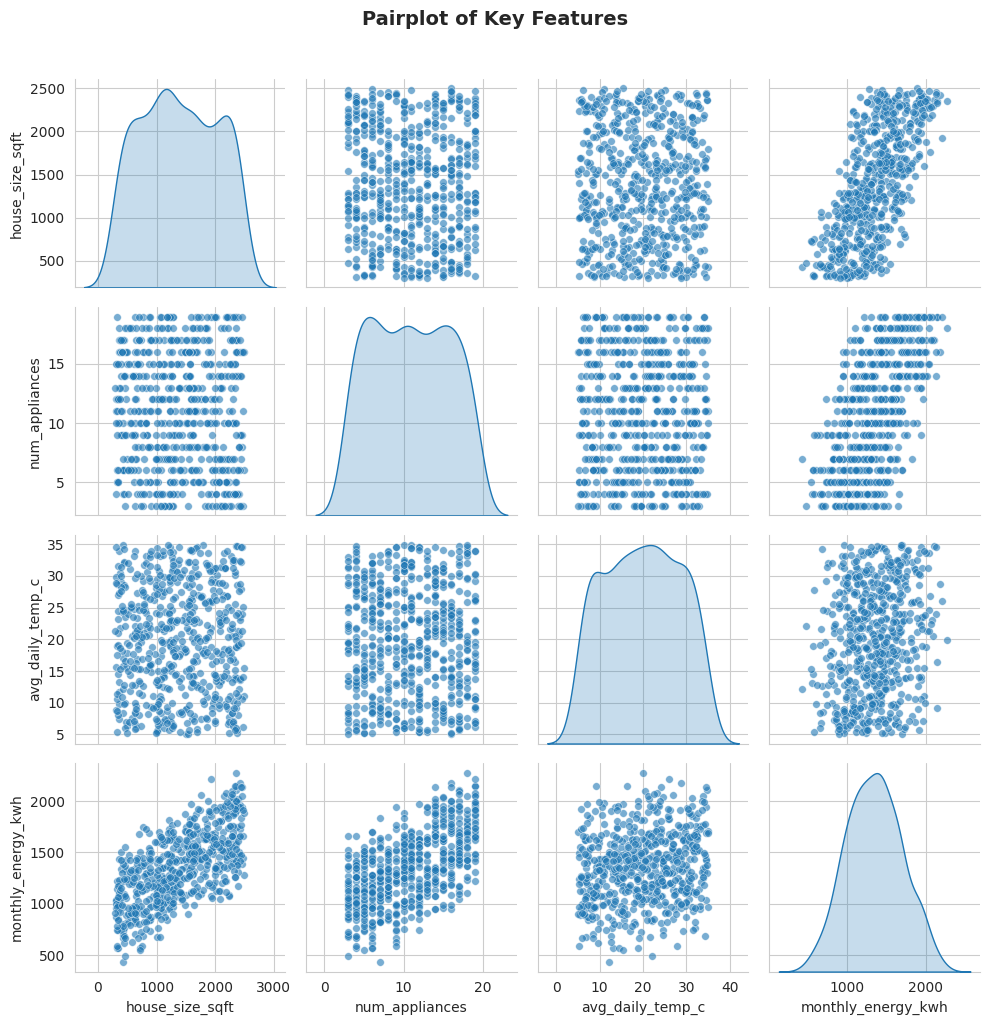

Insight: Pairplot shows relationships between multiple variables simultaneously.


In [16]:
# Pairplot for key features
key_features = ['house_size_sqft', 'num_appliances', 'avg_daily_temp_c', 'monthly_energy_kwh']
sns.pairplot(df[key_features], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Insight: Pairplot shows relationships between multiple variables simultaneously.")

### 2.3 Data Preprocessing

In [21]:
# Prepare features and target
# Remove 'high_energy_usage' as it's the classification target, not needed for regression
X = df.drop(['monthly_energy_kwh', 'high_energy_usage'], axis=1)
y = df['monthly_energy_kwh']

print("Features (X):")
print(X.columns.tolist())
print(f"\nFeature shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget variable: monthly_energy_kwh")
print(f"Target range: [{y.min():.2f}, {y.max():.2f}] kWh")

Features (X):
['household_size', 'monthly_income_usd', 'house_size_sqft', 'num_appliances', 'avg_daily_temp_c', 'solar_installed']

Feature shape: (600, 6)
Target shape: (600,)

Target variable: monthly_energy_kwh
Target range: [431.57, 2276.11] kWh


In [22]:
# Split data for neural network
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (critical for neural networks)
scaler_nn = StandardScaler()
X_train_nn_scaled = scaler_nn.fit_transform(X_train_nn)
X_test_nn_scaled = scaler_nn.transform(X_test_nn)

# Scale target for better neural network performance
scaler_y_nn = StandardScaler()
y_train_nn_scaled = scaler_y_nn.fit_transform(y_train_nn.values.reshape(-1, 1)).ravel()
y_test_nn_scaled = scaler_y_nn.transform(y_test_nn.values.reshape(-1, 1)).ravel()

print(f"Training set size: {X_train_nn_scaled.shape[0]}")
print(f"Test set size: {X_test_nn_scaled.shape[0]}")

Training set size: 480
Test set size: 120


In [23]:

nn_model = MLPRegressor(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    learning_rate_init=0.001
)


print("Training Neural Network...")
nn_model.fit(X_train_nn_scaled, y_train_nn_scaled)
print("Training completed!")
print(f"\nNumber of iterations: {nn_model.n_iter_}")
print(f"Loss: {nn_model.loss_:.4f}")

Training Neural Network...
Training completed!

Number of iterations: 102
Loss: 0.0147


### 3.2 Neural Network Evaluation

In [24]:
# Predictions (scaled)
y_train_pred_nn_scaled = nn_model.predict(X_train_nn_scaled)
y_test_pred_nn_scaled = nn_model.predict(X_test_nn_scaled)

# Inverse transform predictions back to original scale
y_train_pred_nn = scaler_y_nn.inverse_transform(y_train_pred_nn_scaled.reshape(-1, 1)).ravel()
y_test_pred_nn = scaler_y_nn.inverse_transform(y_test_pred_nn_scaled.reshape(-1, 1)).ravel()

# Calculate metrics - Training set
train_mae_nn = mean_absolute_error(y_train_nn, y_train_pred_nn)
train_mse_nn = mean_squared_error(y_train_nn, y_train_pred_nn)
train_rmse_nn = np.sqrt(train_mse_nn)
train_r2_nn = r2_score(y_train_nn, y_train_pred_nn)

# Calculate metrics - Test set
test_mae_nn = mean_absolute_error(y_test_nn, y_test_pred_nn)
test_mse_nn = mean_squared_error(y_test_nn, y_test_pred_nn)
test_rmse_nn = np.sqrt(test_mse_nn)
test_r2_nn = r2_score(y_test_nn, y_test_pred_nn)

print("=" * 60)
print("NEURAL NETWORK - TRAINING SET PERFORMANCE")
print("=" * 60)
print(f"MAE:        {train_mae_nn:.2f} kWh")
print(f"MSE:        {train_mse_nn:.2f}")
print(f"RMSE:       {train_rmse_nn:.2f} kWh")
print(f"R² Score:   {train_r2_nn:.4f}")

print("\n" + "=" * 60)
print("NEURAL NETWORK - TEST SET PERFORMANCE")
print("=" * 60)
print(f"MAE:        {test_mae_nn:.2f} kWh")
print(f"MSE:        {test_mse_nn:.2f}")
print(f"RMSE:       {test_rmse_nn:.2f} kWh")
print(f"R² Score:   {test_r2_nn:.4f}")

NEURAL NETWORK - TRAINING SET PERFORMANCE
MAE:        48.88 kWh
MSE:        3829.04
RMSE:       61.88 kWh
R² Score:   0.9693

NEURAL NETWORK - TEST SET PERFORMANCE
MAE:        58.24 kWh
MSE:        4868.53
RMSE:       69.77 kWh
R² Score:   0.9576


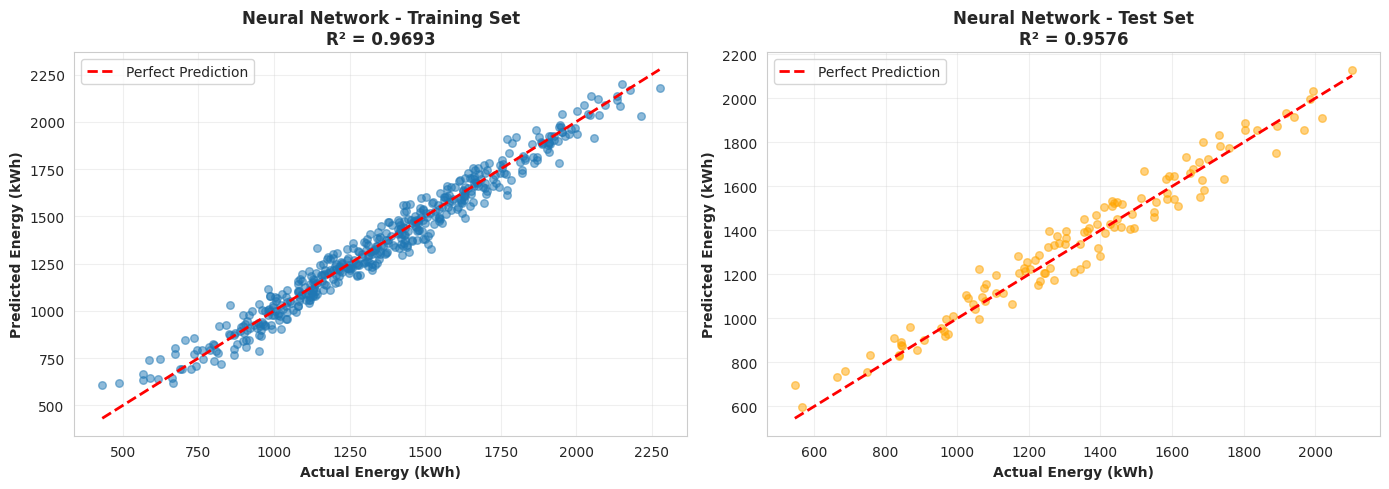

In [25]:
# Visualization: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train_nn, y_train_pred_nn, alpha=0.5, s=30)
axes[0].plot([y_train_nn.min(), y_train_nn.max()], [y_train_nn.min(), y_train_nn.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Energy (kWh)', fontweight='bold')
axes[0].set_ylabel('Predicted Energy (kWh)', fontweight='bold')
axes[0].set_title(f'Neural Network - Training Set\nR² = {train_r2_nn:.4f}', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test_nn, y_test_pred_nn, alpha=0.5, s=30, color='orange')
axes[1].plot([y_test_nn.min(), y_test_nn.max()], [y_test_nn.min(), y_test_nn.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Energy (kWh)', fontweight='bold')
axes[1].set_ylabel('Predicted Energy (kWh)', fontweight='bold')
axes[1].set_title(f'Neural Network - Test Set\nR² = {test_r2_nn:.4f}', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

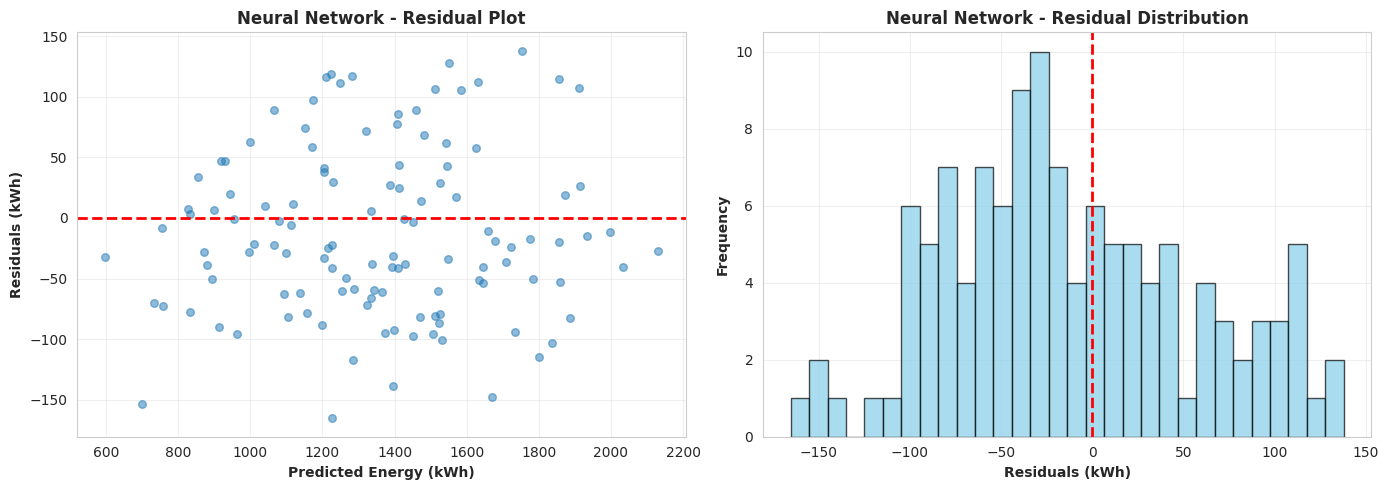

Mean Residual: -13.08 kWh
Std Dev of Residuals: 68.83 kWh


In [26]:
# Residual plot
residuals_nn = y_test_nn - y_test_pred_nn

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual scatter plot
axes[0].scatter(y_test_pred_nn, residuals_nn, alpha=0.5, s=30)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Energy (kWh)', fontweight='bold')
axes[0].set_ylabel('Residuals (kWh)', fontweight='bold')
axes[0].set_title('Neural Network - Residual Plot', fontweight='bold')
axes[0].grid(alpha=0.3)

# Residual distribution
axes[1].hist(residuals_nn, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals (kWh)', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Neural Network - Residual Distribution', fontweight='bold')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean Residual: {residuals_nn.mean():.2f} kWh")
print(f"Std Dev of Residuals: {residuals_nn.std():.2f} kWh")

In [27]:
# Split data for classical ML models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 480 samples
Test set: 120 samples


### 4.1 Model 1: Linear Regression

In [28]:
# Build Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics - Training
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)

# Calculate metrics - Test
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print("=" * 60)
print("LINEAR REGRESSION - PERFORMANCE")
print("=" * 60)
print("\nTraining Set:")
print(f"MAE:      {train_mae_lr:.2f} kWh")
print(f"RMSE:     {train_rmse_lr:.2f} kWh")
print(f"R² Score: {train_r2_lr:.4f}")

print("\nTest Set:")
print(f"MAE:      {test_mae_lr:.2f} kWh")
print(f"RMSE:     {test_rmse_lr:.2f} kWh")
print(f"R² Score: {test_r2_lr:.4f}")

# Feature coefficients
print("\nFeature Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df.to_string(index=False))

LINEAR REGRESSION - PERFORMANCE

Training Set:
MAE:      38.74 kWh
RMSE:     47.96 kWh
R² Score: 0.9815

Test Set:
MAE:      41.76 kWh
RMSE:     51.29 kWh
R² Score: 0.9771

Feature Coefficients:
           Feature  Coefficient
   house_size_sqft   248.917973
    num_appliances   222.069704
    household_size    97.868828
  avg_daily_temp_c    70.031907
   solar_installed   -60.408376
monthly_income_usd     6.867471


### 4.2 Model 2: Random Forest Regressor

In [29]:
# Build Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate metrics - Training
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Calculate metrics - Test
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("=" * 60)
print("RANDOM FOREST - PERFORMANCE")
print("=" * 60)
print("\nTraining Set:")
print(f"MAE:      {train_mae_rf:.2f} kWh")
print(f"RMSE:     {train_rmse_rf:.2f} kWh")
print(f"R² Score: {train_r2_rf:.4f}")

print("\nTest Set:")
print(f"MAE:      {test_mae_rf:.2f} kWh")
print(f"RMSE:     {test_rmse_rf:.2f} kWh")
print(f"R² Score: {test_r2_rf:.4f}")

RANDOM FOREST - PERFORMANCE

Training Set:
MAE:      29.76 kWh
RMSE:     37.48 kWh
R² Score: 0.9887

Test Set:
MAE:      78.55 kWh
RMSE:     99.88 kWh
R² Score: 0.9130


### 4.3 Initial Model Comparison


Initial Model Comparison:
            Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  Test R²
Linear Regression  38.735633 41.761463   47.964291  51.292622  0.981531 0.977067
    Random Forest  29.758875 78.553752   37.482980  99.879623  0.988721 0.913042


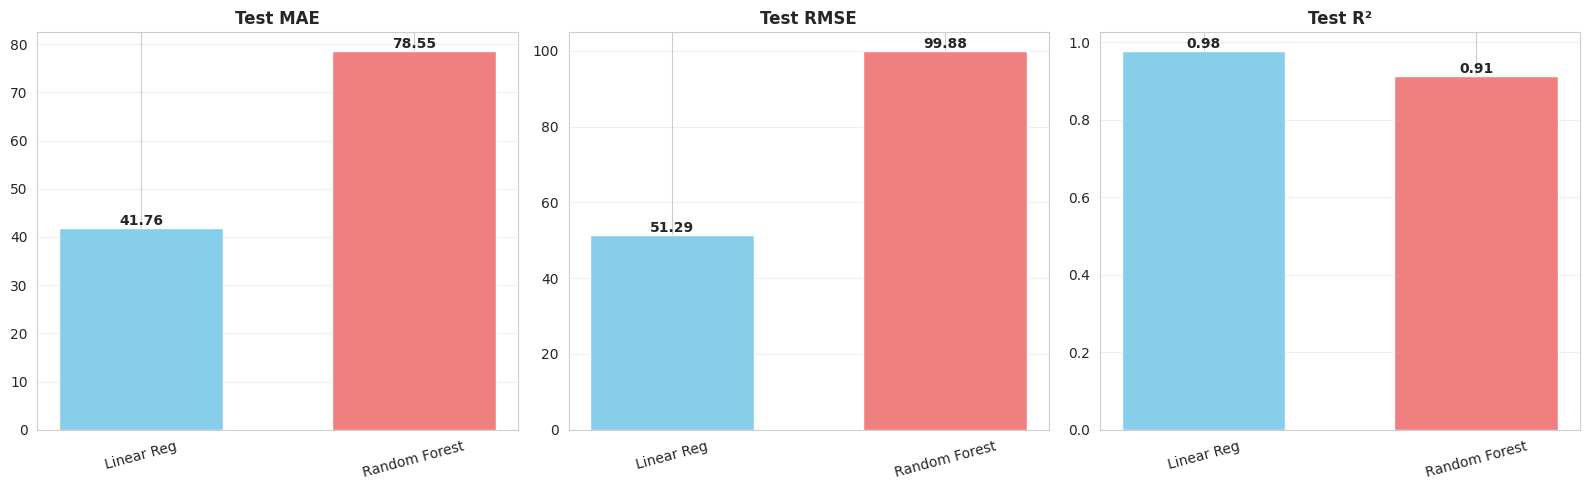

In [30]:
# Compare models
comparison_data = {
    'Model': ['Linear Regression', 'Random Forest'],
    'Train MAE': [train_mae_lr, train_mae_rf],
    'Test MAE': [test_mae_lr, test_mae_rf],
    'Train RMSE': [train_rmse_lr, train_rmse_rf],
    'Test RMSE': [test_rmse_lr, test_rmse_rf],
    'Train R²': [train_r2_lr, train_r2_rf],
    'Test R²': [test_r2_lr, test_r2_rf]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nInitial Model Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['MAE', 'RMSE', 'R²']
lr_values = [test_mae_lr, test_rmse_lr, test_r2_lr]
rf_values = [test_mae_rf, test_rmse_rf, test_r2_rf]

x = np.arange(len(metrics))
width = 0.35

for idx, metric in enumerate(metrics):
    axes[idx].bar([0, 1], [lr_values[idx], rf_values[idx]],
                  color=['skyblue', 'lightcoral'], width=0.6)
    axes[idx].set_title(f'Test {metric}', fontweight='bold')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Linear Reg', 'Random Forest'], rotation=15)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add values on bars
    for i, val in enumerate([lr_values[idx], rf_values[idx]]):
        axes[idx].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

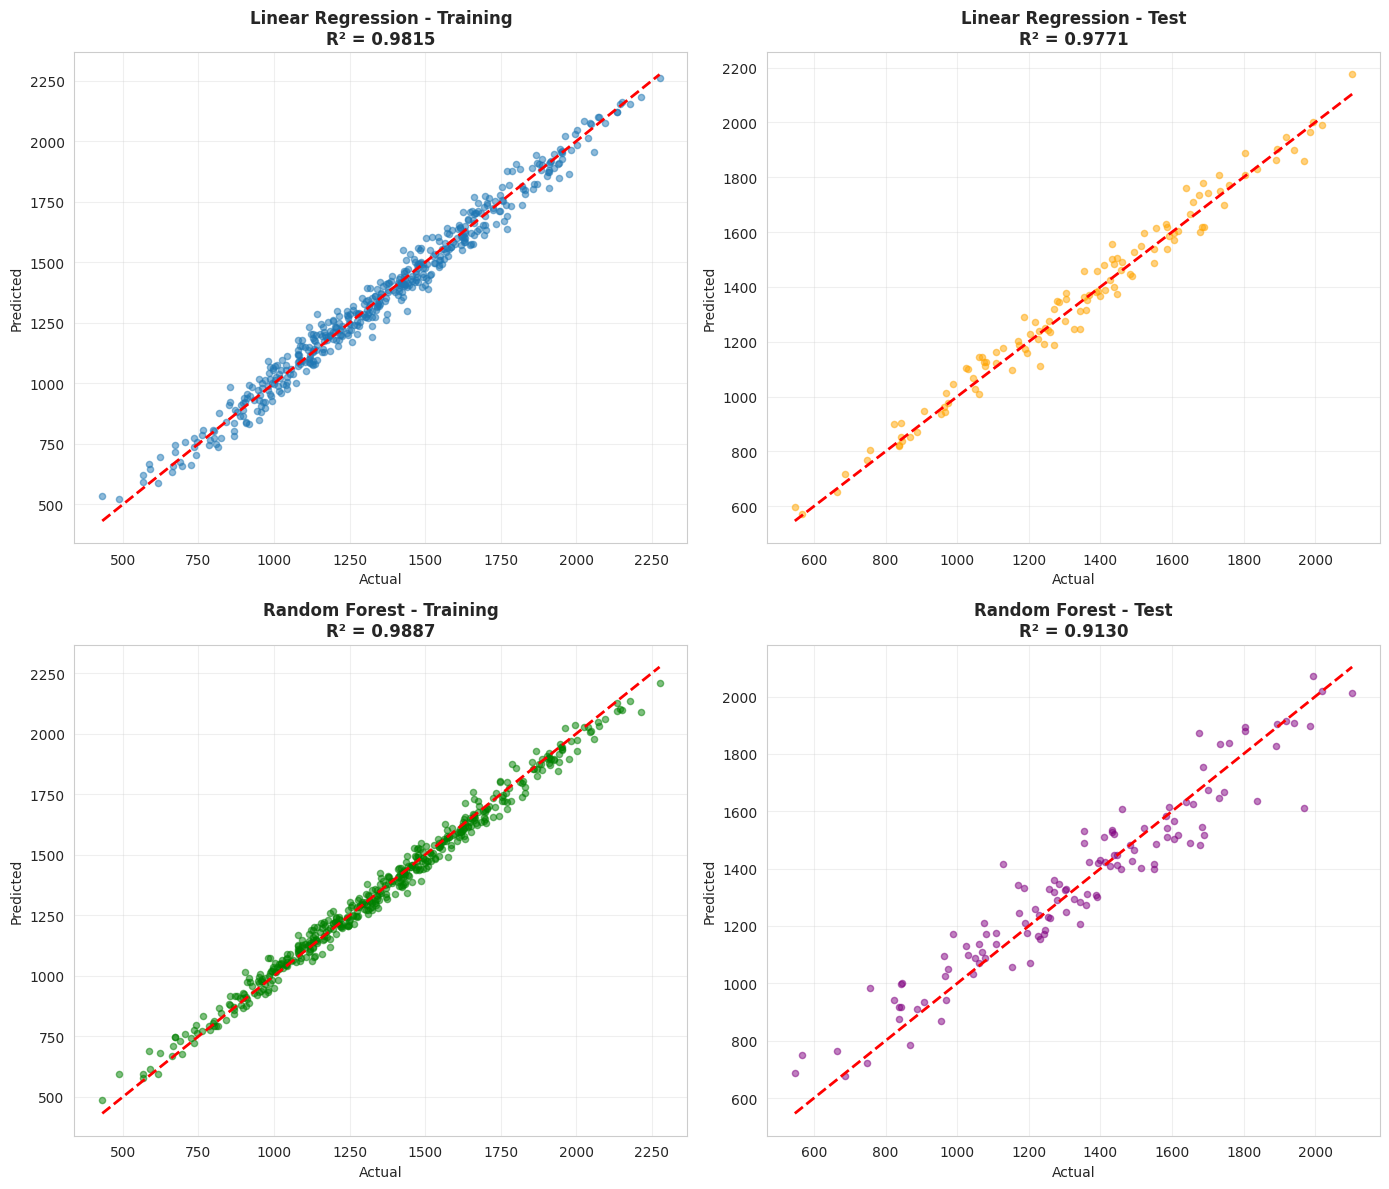

In [31]:
# Actual vs Predicted comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Linear Regression - Train
axes[0, 0].scatter(y_train, y_train_pred_lr, alpha=0.5, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_title(f'Linear Regression - Training\nR² = {train_r2_lr:.4f}', fontweight='bold')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].grid(alpha=0.3)

# Linear Regression - Test
axes[0, 1].scatter(y_test, y_test_pred_lr, alpha=0.5, s=20, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_title(f'Linear Regression - Test\nR² = {test_r2_lr:.4f}', fontweight='bold')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].grid(alpha=0.3)

# Random Forest - Train
axes[1, 0].scatter(y_train, y_train_pred_rf, alpha=0.5, s=20, color='green')
axes[1, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[1, 0].set_title(f'Random Forest - Training\nR² = {train_r2_rf:.4f}', fontweight='bold')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')
axes[1, 0].grid(alpha=0.3)

# Random Forest - Test
axes[1, 1].scatter(y_test, y_test_pred_rf, alpha=0.5, s=20, color='purple')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_title(f'Random Forest - Test\nR² = {test_r2_rf:.4f}', fontweight='bold')
axes[1, 1].set_xlabel('Actual')
axes[1, 1].set_ylabel('Predicted')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Task 4: Hyperparameter Optimization with Cross-Validation <a id='task4'></a>

### 5.1 Linear Regression Hyperparameter Tuning (Ridge Regression)

In [32]:
# For Linear Regression, we'll use Ridge Regression with regularization
from sklearn.linear_model import Ridge

# Define parameter grid
lr_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# GridSearchCV
lr_grid_search = GridSearchCV(
    Ridge(random_state=42),
    lr_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Performing Grid Search for Ridge Regression...")
lr_grid_search.fit(X_train_scaled, y_train)

print("\n" + "=" * 60)
print("RIDGE REGRESSION - BEST PARAMETERS")
print("=" * 60)
print(f"Best Parameters: {lr_grid_search.best_params_}")
print(f"Best CV Score (R²): {lr_grid_search.best_score_:.4f}")

Performing Grid Search for Ridge Regression...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

RIDGE REGRESSION - BEST PARAMETERS
Best Parameters: {'alpha': 0.1}
Best CV Score (R²): 0.9806


### 5.2 Random Forest Hyperparameter Tuning

In [33]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Performing Grid Search for Random Forest...")
rf_grid_search.fit(X_train, y_train)

print("\n" + "=" * 60)
print("RANDOM FOREST - BEST PARAMETERS")
print("=" * 60)
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best CV Score (R²): {rf_grid_search.best_score_:.4f}")

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

RANDOM FOREST - BEST PARAMETERS
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score (R²): 0.9152


## 6. Task 5: Feature Selection <a id='task5'></a>

### 6.1 Feature Selection for Linear Regression (using RFE)

In [34]:
# RFE for Ridge Regression
lr_best_model = lr_grid_search.best_estimator_
rfe_lr = RFE(estimator=lr_best_model, n_features_to_select=4)
rfe_lr.fit(X_train_scaled, y_train)

# Selected features
selected_features_lr = X.columns[rfe_lr.support_].tolist()

print("=" * 60)
print("RIDGE REGRESSION - FEATURE SELECTION (RFE)")
print("=" * 60)
print(f"\nNumber of features selected: {len(selected_features_lr)}")
print(f"Selected features: {selected_features_lr}")
print("\nFeature Ranking:")
for feature, rank in zip(X.columns, rfe_lr.ranking_):
    print(f"{feature:25s} - Rank: {rank}")

RIDGE REGRESSION - FEATURE SELECTION (RFE)

Number of features selected: 4
Selected features: ['household_size', 'house_size_sqft', 'num_appliances', 'avg_daily_temp_c']

Feature Ranking:
household_size            - Rank: 1
monthly_income_usd        - Rank: 3
house_size_sqft           - Rank: 1
num_appliances            - Rank: 1
avg_daily_temp_c          - Rank: 1
solar_installed           - Rank: 2


### 6.2 Feature Selection for Random Forest (using Feature Importance)

RANDOM FOREST - FEATURE IMPORTANCE
           feature  importance
   house_size_sqft    0.492824
    num_appliances    0.372036
    household_size    0.056068
  avg_daily_temp_c    0.045047
monthly_income_usd    0.018556
   solar_installed    0.015469

Top 4 selected features: ['house_size_sqft', 'num_appliances', 'household_size', 'avg_daily_temp_c']


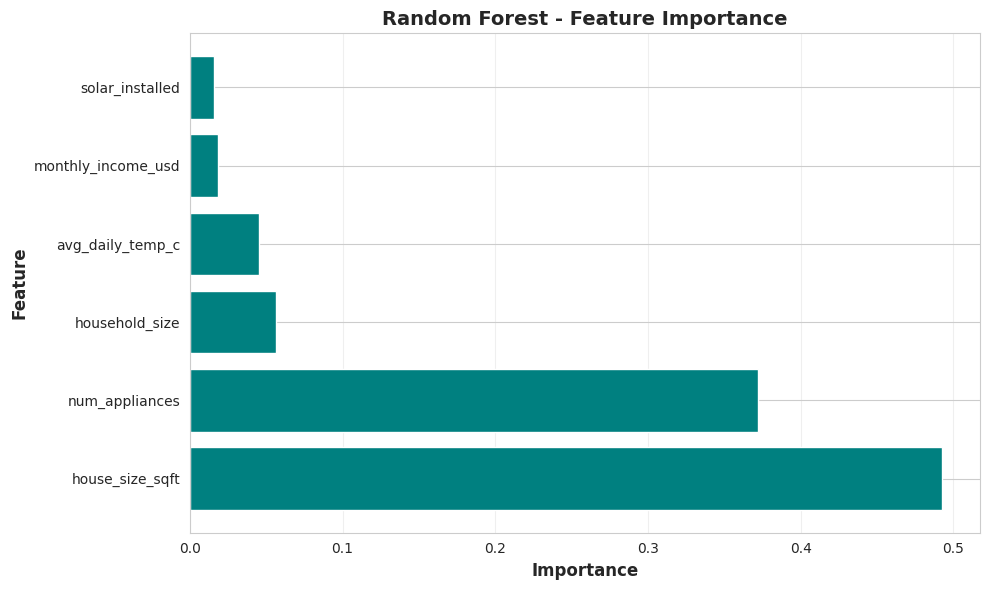

In [35]:
# Feature importance from Random Forest
rf_best_model = rf_grid_search.best_estimator_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("=" * 60)
print("RANDOM FOREST - FEATURE IMPORTANCE")
print("=" * 60)
print(feature_importance.to_string(index=False))

# Select top 4 features
selected_features_rf = feature_importance.head(4)['feature'].tolist()
print(f"\nTop 4 selected features: {selected_features_rf}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='teal')
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Feature', fontweight='bold', fontsize=12)
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Task 6: Final Models and Comparative Analysis <a id='task6'></a>

In [36]:
# Prepare data with selected features
X_train_lr_selected = X_train[selected_features_lr]
X_test_lr_selected = X_test[selected_features_lr]

X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

# Scale for Ridge Regression
scaler_final = StandardScaler()
X_train_lr_scaled_selected = scaler_final.fit_transform(X_train_lr_selected)
X_test_lr_scaled_selected = scaler_final.transform(X_test_lr_selected)

print("Data prepared with selected features")
print(f"Ridge Regression features: {selected_features_lr}")
print(f"Random Forest features: {selected_features_rf}")

Data prepared with selected features
Ridge Regression features: ['household_size', 'house_size_sqft', 'num_appliances', 'avg_daily_temp_c']
Random Forest features: ['house_size_sqft', 'num_appliances', 'household_size', 'avg_daily_temp_c']


### 7.1 Final Ridge Regression Model

In [37]:
# Build final Ridge Regression model
final_lr_model = Ridge(**lr_grid_search.best_params_, random_state=42)
final_lr_model.fit(X_train_lr_scaled_selected, y_train)

# Cross-validation score
cv_scores_lr = cross_val_score(final_lr_model, X_train_lr_scaled_selected, y_train,
                                cv=5, scoring='r2')

# Predictions
y_test_pred_final_lr = final_lr_model.predict(X_test_lr_scaled_selected)

# Metrics
lr_mae = mean_absolute_error(y_test, y_test_pred_final_lr)
lr_mse = mean_squared_error(y_test, y_test_pred_final_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_test_pred_final_lr)
lr_cv_score = cv_scores_lr.mean()

print("=" * 60)
print("FINAL RIDGE REGRESSION MODEL - PERFORMANCE")
print("=" * 60)
print(f"Features Used: {selected_features_lr}")
print(f"Number of Features: {len(selected_features_lr)}")
print(f"\nCV Score (R²):  {lr_cv_score:.4f}")
print(f"Test MAE:       {lr_mae:.2f} kWh")
print(f"Test RMSE:      {lr_rmse:.2f} kWh")
print(f"Test R²:        {lr_r2:.4f}")

FINAL RIDGE REGRESSION MODEL - PERFORMANCE
Features Used: ['household_size', 'house_size_sqft', 'num_appliances', 'avg_daily_temp_c']
Number of Features: 4

CV Score (R²):  0.9501
Test MAE:       62.70 kWh
Test RMSE:      77.25 kWh
Test R²:        0.9480


### 7.2 Final Random Forest Model

In [38]:
# Build final Random Forest model
final_rf_model = RandomForestRegressor(**rf_grid_search.best_params_, random_state=42)
final_rf_model.fit(X_train_rf_selected, y_train)

# Cross-validation score
cv_scores_rf = cross_val_score(final_rf_model, X_train_rf_selected, y_train,
                                cv=5, scoring='r2')

# Predictions
y_test_pred_final_rf = final_rf_model.predict(X_test_rf_selected)

# Metrics
rf_mae = mean_absolute_error(y_test, y_test_pred_final_rf)
rf_mse = mean_squared_error(y_test, y_test_pred_final_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_test_pred_final_rf)
rf_cv_score = cv_scores_rf.mean()

print("=" * 60)
print("FINAL RANDOM FOREST MODEL - PERFORMANCE")
print("=" * 60)
print(f"Features Used: {selected_features_rf}")
print(f"Number of Features: {len(selected_features_rf)}")
print(f"\nCV Score (R²):  {rf_cv_score:.4f}")
print(f"Test MAE:       {rf_mae:.2f} kWh")
print(f"Test RMSE:      {rf_rmse:.2f} kWh")
print(f"Test R²:        {rf_r2:.4f}")

FINAL RANDOM FOREST MODEL - PERFORMANCE
Features Used: ['house_size_sqft', 'num_appliances', 'household_size', 'avg_daily_temp_c']
Number of Features: 4

CV Score (R²):  0.9050
Test MAE:       86.37 kWh
Test RMSE:      106.88 kWh
Test R²:        0.9004


### 7.3 Final Model Comparison

In [41]:
# Create comparison table
final_comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest'],
    'Features Used': [f"{len(selected_features_lr)}", f"{len(selected_features_rf)}"],
    'CV Score': [f"{lr_cv_score:.4f}", f"{rf_cv_score:.4f}"],
    'Test MAE': [f"{lr_mae:.2f}", f"{rf_mae:.2f}"],
    'Test RMSE': [f"{lr_rmse:.2f}", f"{rf_rmse:.2f}"],
    'Test R²': [f"{lr_r2:.4f}", f"{rf_r2:.4f}"]
})

print("\n" + "=" * 80)
print("FINAL MODEL COMPARISON")
print("=" * 80)
print(final_comparison.to_string(index=False))

plt.savefig("sample_data/confusion_matrices.png", dpi=300, bbox_inches='tight')
print("\nComparison table saved!")


FINAL MODEL COMPARISON
           Model Features Used CV Score Test MAE Test RMSE Test R²
Ridge Regression             4   0.9501    62.70     77.25  0.9480
   Random Forest             4   0.9050    86.37    106.88  0.9004

Comparison table saved!


<Figure size 1000x600 with 0 Axes>

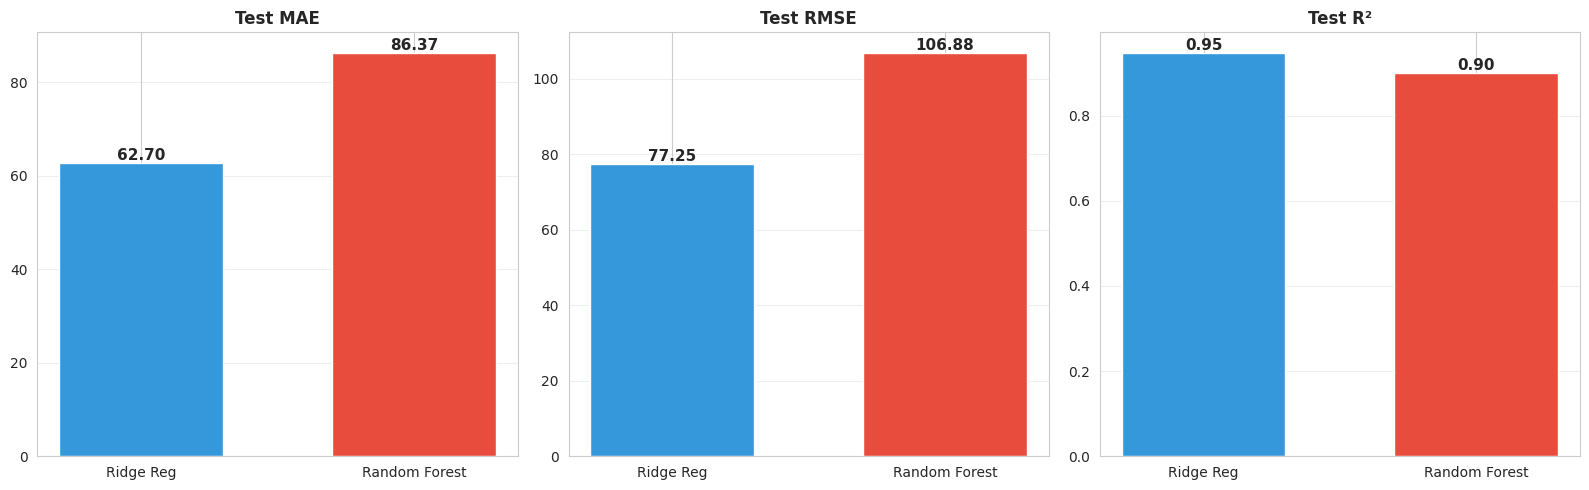

Comparison chart saved!


In [42]:
# Visualize final comparison
metrics = ['MAE', 'RMSE', 'R²']
lr_scores = [lr_mae, lr_rmse, lr_r2]
rf_scores = [rf_mae, rf_rmse, rf_r2]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (metric, lr_val, rf_val) in enumerate(zip(metrics, lr_scores, rf_scores)):
    axes[idx].bar([0, 1], [lr_val, rf_val], color=['#3498db', '#e74c3c'], width=0.6)
    axes[idx].set_title(f'Test {metric}', fontweight='bold', fontsize=12)
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Ridge Reg', 'Random Forest'], rotation=0)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels
    for i, val in enumerate([lr_val, rf_val]):
        axes[idx].text(i, val, f'{val:.2f}', ha='center', va='bottom',
                      fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig("sample_data/confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

print("Comparison chart saved!")

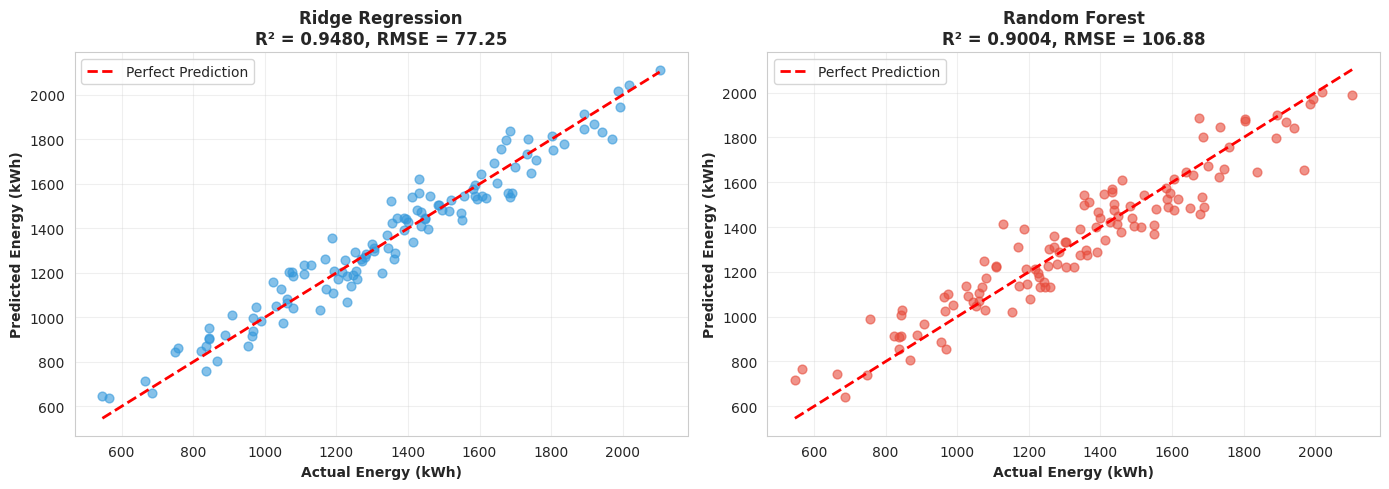

In [43]:
# Actual vs Predicted for final models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ridge Regression
axes[0].scatter(y_test, y_test_pred_final_lr, alpha=0.6, s=40, color='#3498db')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Energy (kWh)', fontweight='bold')
axes[0].set_ylabel('Predicted Energy (kWh)', fontweight='bold')
axes[0].set_title(f'Ridge Regression\nR² = {lr_r2:.4f}, RMSE = {lr_rmse:.2f}', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_test_pred_final_rf, alpha=0.6, s=40, color='#e74c3c')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Energy (kWh)', fontweight='bold')
axes[1].set_ylabel('Predicted Energy (kWh)', fontweight='bold')
axes[1].set_title(f'Random Forest\nR² = {rf_r2:.4f}, RMSE = {rf_rmse:.2f}', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("sample_data/confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

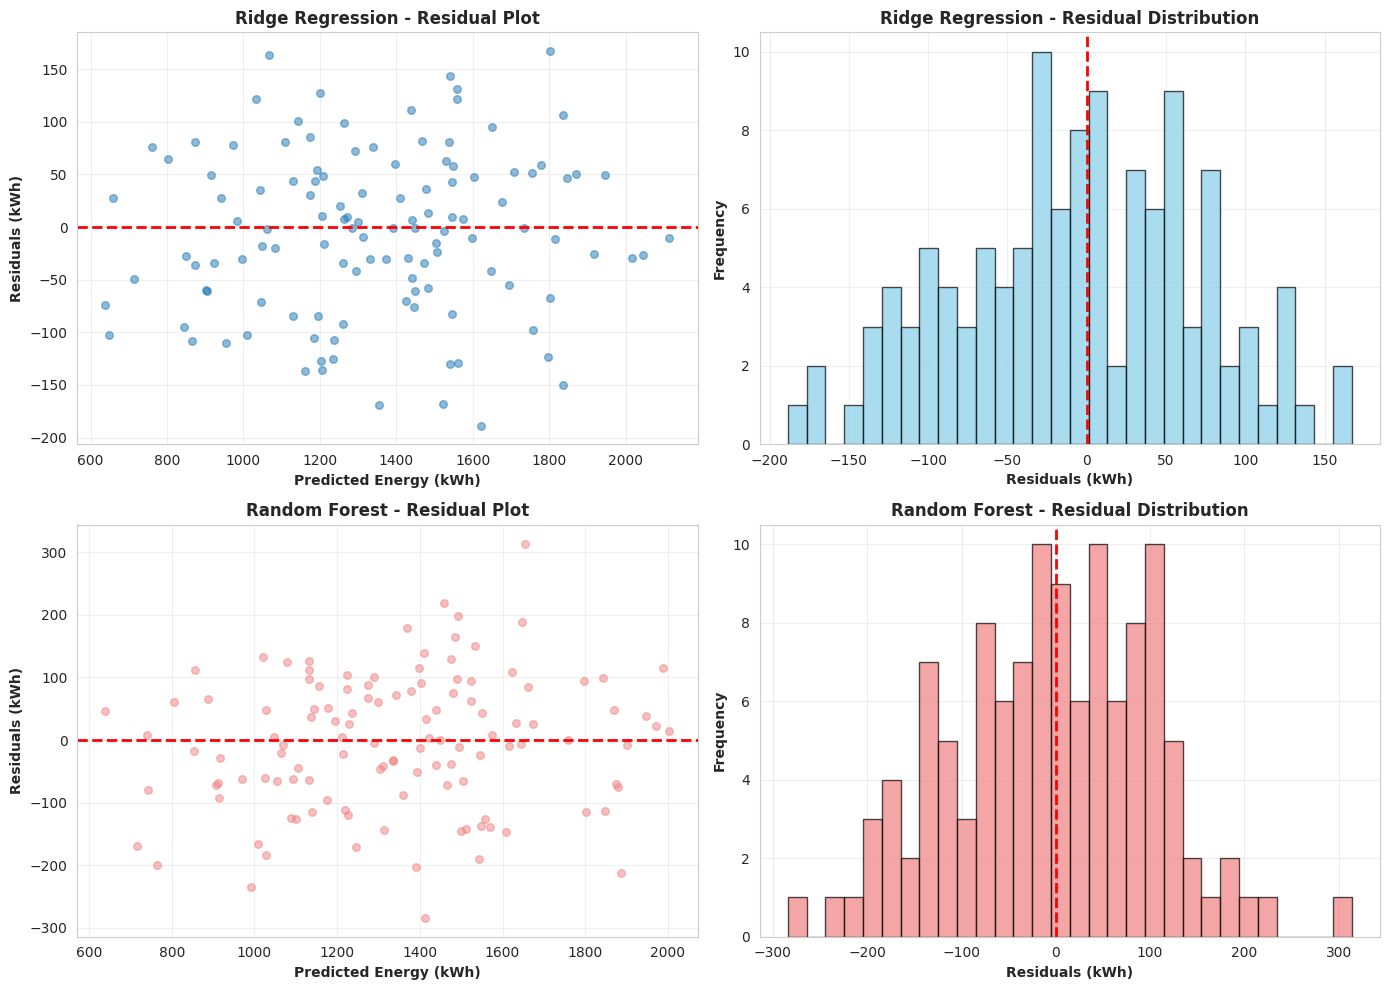


Ridge Regression - Mean Residual: -5.68 kWh
Ridge Regression - Std Dev Residuals: 77.36 kWh

Random Forest - Mean Residual: -3.83 kWh
Random Forest - Std Dev Residuals: 107.26 kWh


In [44]:
# Residual analysis for final models
residuals_lr = y_test - y_test_pred_final_lr
residuals_rf = y_test - y_test_pred_final_rf

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Ridge - Residual plot
axes[0, 0].scatter(y_test_pred_final_lr, residuals_lr, alpha=0.5, s=30)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Energy (kWh)', fontweight='bold')
axes[0, 0].set_ylabel('Residuals (kWh)', fontweight='bold')
axes[0, 0].set_title('Ridge Regression - Residual Plot', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Ridge - Residual distribution
axes[0, 1].hist(residuals_lr, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals (kWh)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Ridge Regression - Residual Distribution', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Random Forest - Residual plot
axes[1, 0].scatter(y_test_pred_final_rf, residuals_rf, alpha=0.5, s=30, color='lightcoral')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Energy (kWh)', fontweight='bold')
axes[1, 0].set_ylabel('Residuals (kWh)', fontweight='bold')
axes[1, 0].set_title('Random Forest - Residual Plot', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Random Forest - Residual distribution
axes[1, 1].hist(residuals_rf, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals (kWh)', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Random Forest - Residual Distribution', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("sample_data/confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"\nRidge Regression - Mean Residual: {residuals_lr.mean():.2f} kWh")
print(f"Ridge Regression - Std Dev Residuals: {residuals_lr.std():.2f} kWh")
print(f"\nRandom Forest - Mean Residual: {residuals_rf.mean():.2f} kWh")
print(f"Random Forest - Std Dev Residuals: {residuals_rf.std():.2f} kWh")